In [0]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pwd 

/content


In [0]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
!chmod 600 kaggle.json


In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
os.environ

!kaggle datasets list -s finance

ref                                                      title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  
cfpb/us-consumer-finance-complaints                      US Consumer Finance Complaints                       84MB  2019-11-14 05:52:29           9390  
danerbland/electionfinance                               Campaign Finance versus Election Results            209KB  2016-12-07 21:14:32           1179  
stefanoleone992/mutual-funds-and-etfs                    US Funds dataset from Yahoo Finance                   4MB  2019-05-04 02:00:37           1757  
rajanand/finance-india                                   Finance ₹ - India                                    25KB  2017-08-27 12:17:02           1298  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking 

### **Attentention: This Process of creating the directory only needs to be executed once, if being done on the same drive. If the data is in the drive in the directory appropriate for the notebook skip these code cells until you see a large stop. **

In [0]:
!mkdir pv_stocks 

In [0]:
cd pv_stocks 



/content/gdrive/My Drive/pv_stocks


In [0]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
cd data 

/content/gdrive/My Drive/pv_stocks/data


In [0]:
#cd /content/gdrive/My Drive/pv_stocks/data  

In [0]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs



 98% 481M/492M [00:08<00:00, 38.7MB/s]
100% 492M/492M [00:08<00:00, 63.2MB/s]


In [0]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

# **`Stop!!!!!!   If the data is already in the appropaiate directory, use the cell below to go directly to that directory. Use "pwd" and ls command in code cells to make sure you are in the correct directory with the correct data. (if error got back and execute cells that were skipped) Or adjust the directory path to that which exists in your computer. `**


In [0]:
####use this command instead if you can jump ahead of the rest of the kaggle-download related cells. 
### jump to this directory becuase there is not direct way to replace multiple different strings at once. 
cd /content/gdrive/My Drive/pv_stocks/data/Stocks 


/content/gdrive/My Drive/pv_stocks/data/Stocks


In [0]:
import glob
######script provided by F Bianco from link above. 
alltss = []

allfiles = np.sort(np.array(glob.glob("*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", 
                                "Close"]].rename({
  "Close":allfiles[0].replace(".txt","")}, axis=1)
for f in allfiles[1:]:
    print(f)
    name = f.replace(".txt","")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename(
      {"Close":name}, axis=1), on="Date")
tss.set_index("Date", inplace=True)


...
print ("shape of the dataset:", tss.shape) 

###The structure of the file should be each row corresponding to a data, and each columun correspoing to a stock data file. 
###the entries are the closing values of each date.  


aa.us.txt
aaap.us.txt
aaba.us.txt
aac.us.txt
aal.us.txt
aamc.us.txt
aame.us.txt
aan.us.txt
aaoi.us.txt
shape of the dataset: (447, 10)


#  data inspection

plot each time series (ts)

i

Text(0, 0.5, 'Closing Value')

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


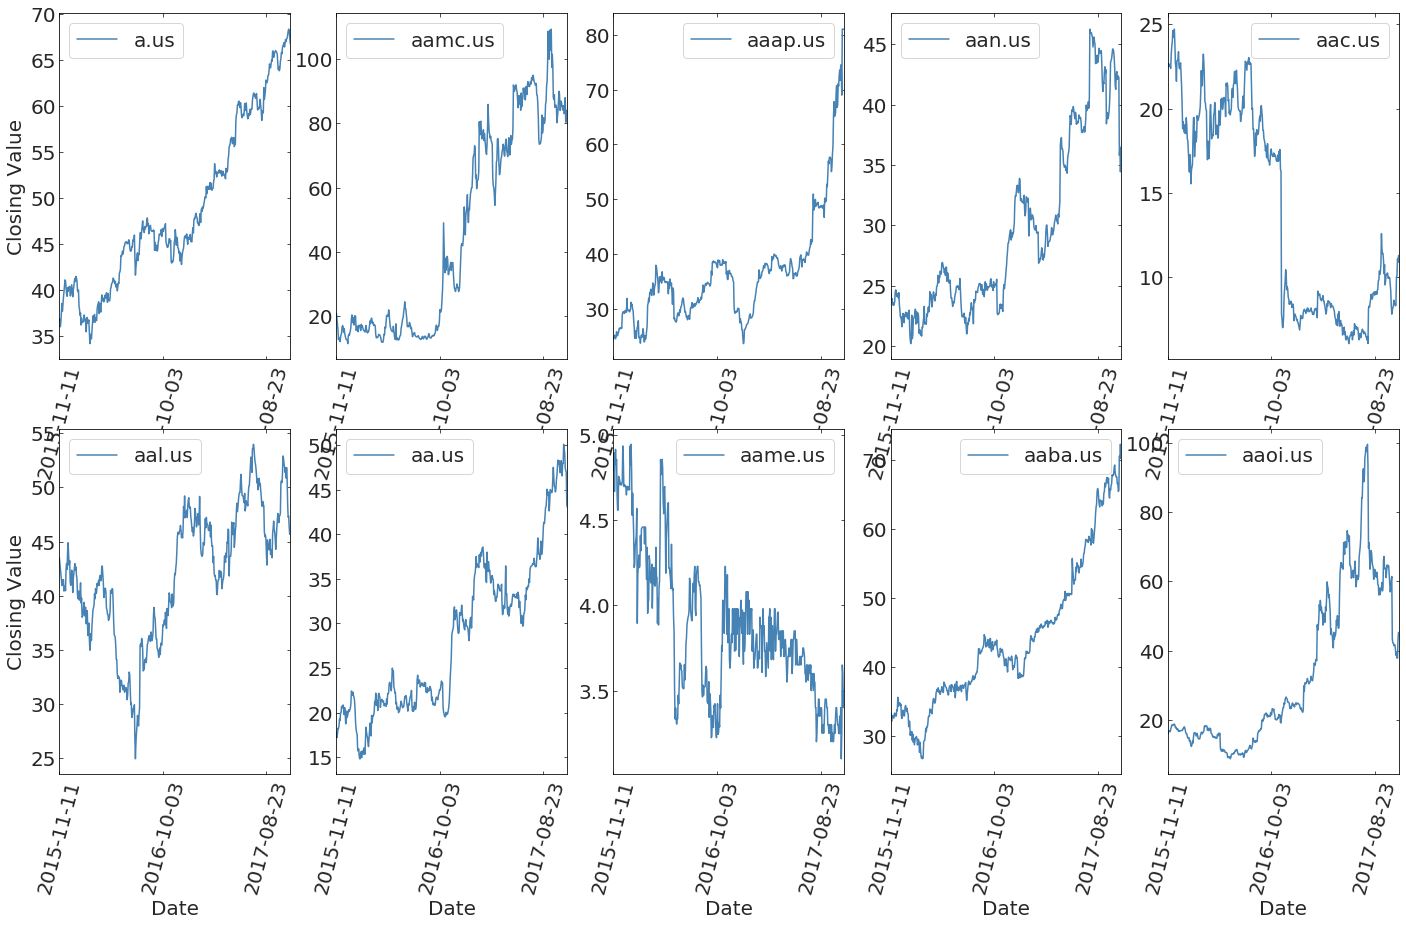

In [0]:
###Loop style adopted from Kaggle notebook, from F. Bianco
j = 0  
fig, axs = pl.subplots(2,5, figsize=(24, 14))

for c in tss.columns:
  
  tss.plot(y=c, ax=axs[j % 2][j % 5], rot=75)
  j = j + 1 

axs[0][0].set_ylabel("Closing Value") 
axs[1][0].set_ylabel("Closing Value") 
  


Figure 1: 
Above are the time series for 10 US stock market data sets. The time axis is labeled by date, while the exogenous variable is the closing value of that stock on that given date. For the purposes of this exercise, we seek to model the time series that are stationary as well as those that are is non-stationary. We will then contrast model predictions as well as contrast the characters and parameters that set the model. 

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb500f2cc0>,
      dtype=object)

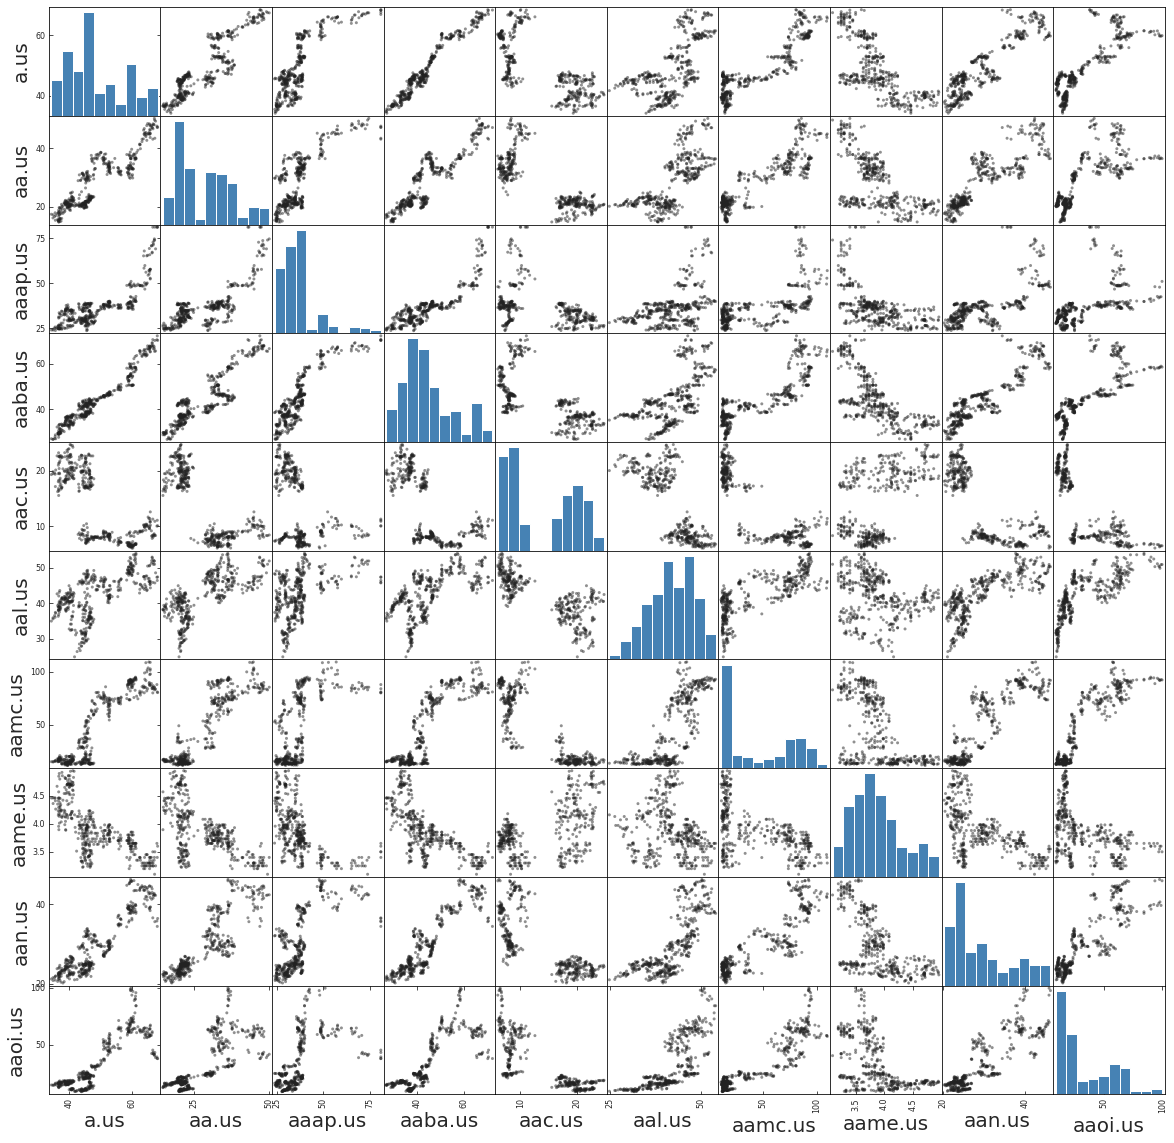

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(tss, figsize  = [20,20], color="#222222")


Figure 2: 
Above is the scatter matrix for the 10 times series.  The main advantage of this plotting is to see the combined varaibaility between the exogenous varaibles in each data set. An example would be the positive linear variation  between "a" and  "aaba", or how stock values is clusting  for "aac" and "aan".  Scatters that have some trend between indicate correlation or anti-correation, while those that are purely spread out would have no correlation. This could be used as a motivator to inspect the correlations and potentially model one stock base on another(such as modeling Apple stock using Microsoft's). 

In [0]:
pd.DataFrame.corr(tss)

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


([<matplotlib.axis.YTick at 0x7f2f47d5cc18>,
 <a list of 10 Text yticklabel objects>)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


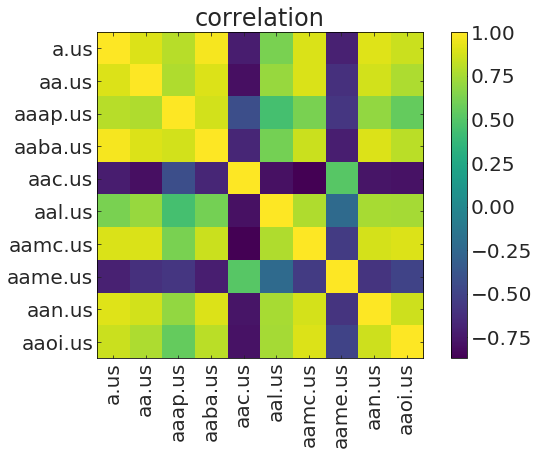

In [0]:
####adopted from skeleton NB
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns)

 Table 1 and  Figure 3: Above are the tabular and graphcial diplays, showing the pairwise correlations between data sets. Along the diagonal would be complete correlation, give the data sets are paired against themselves. The green to yello indicate correaltion between data, while the bluer side tend towards anti correlation. Those about 0.00 would have no correlation between sets.  

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm

In [0]:
threshold = 0.05

###from F. Bianco in orginal skeleton notebook. To test for stationarity in each data set 
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

 

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

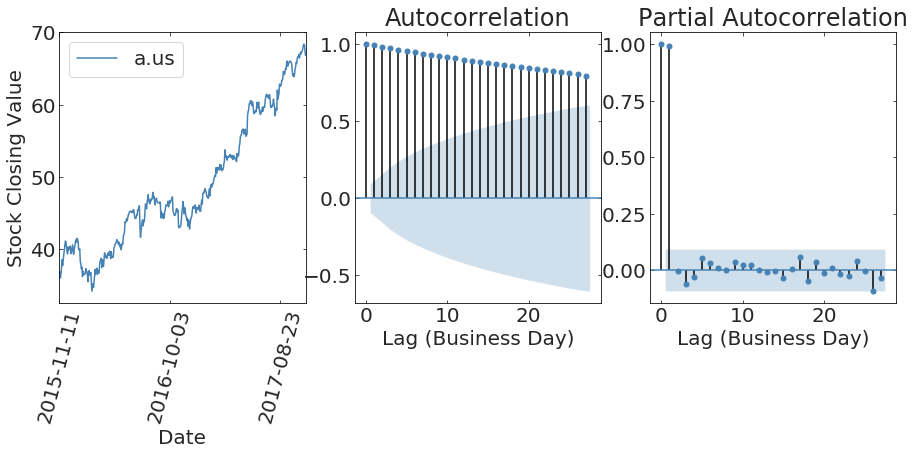

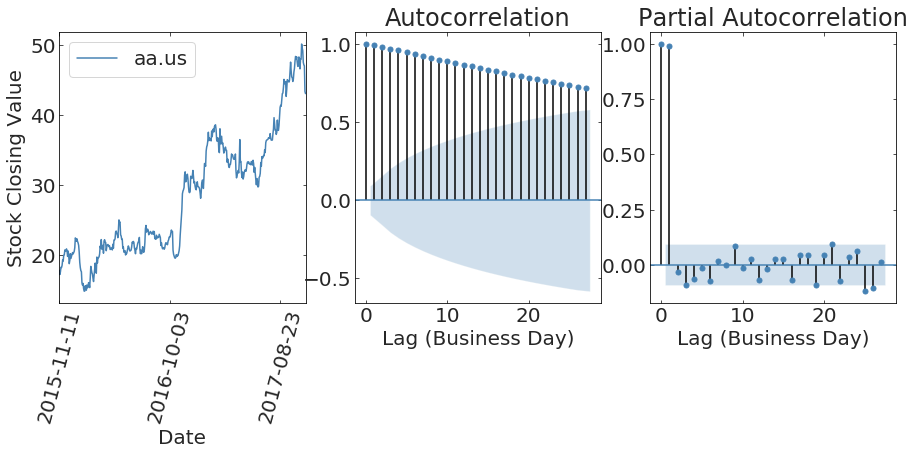

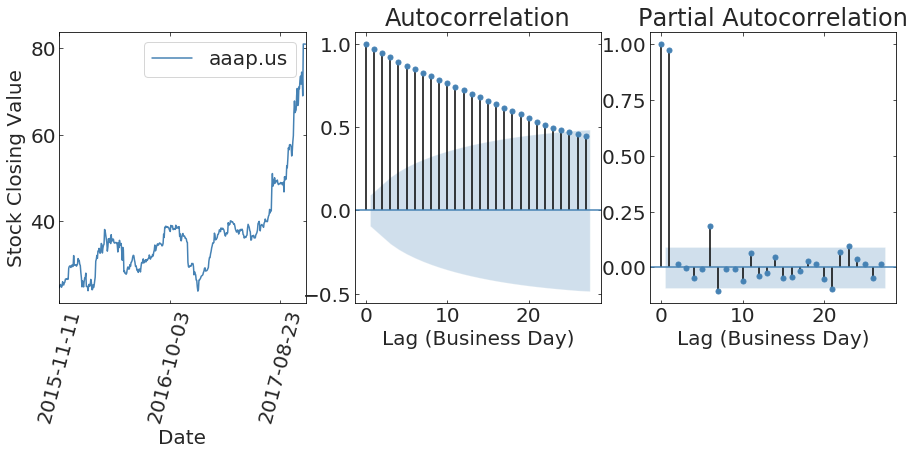

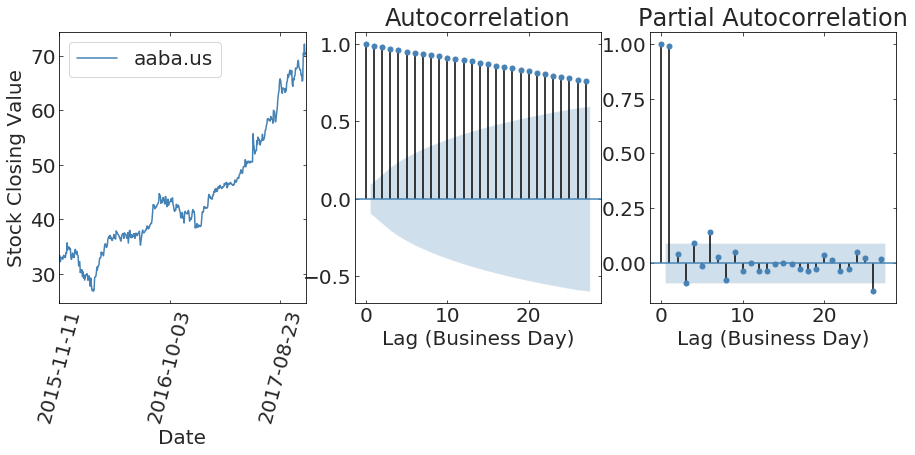

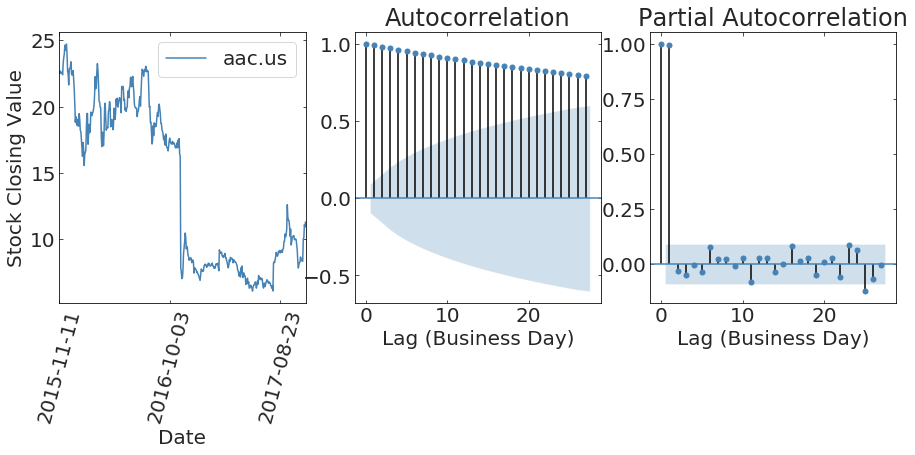

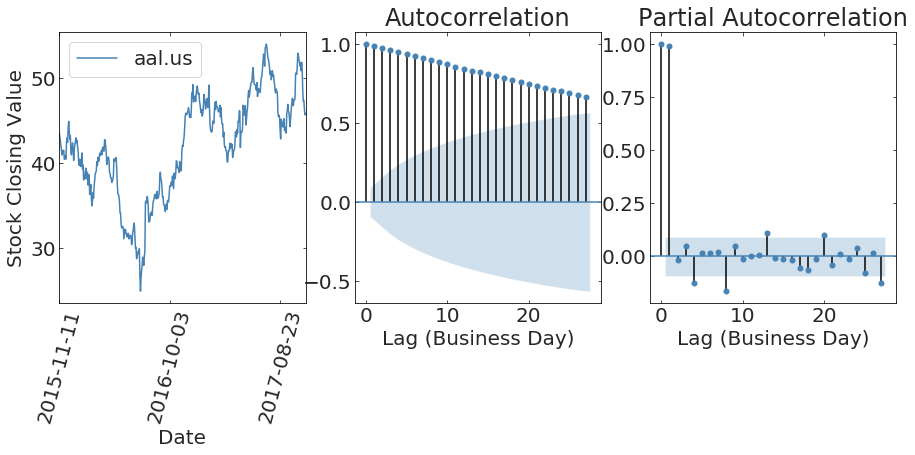

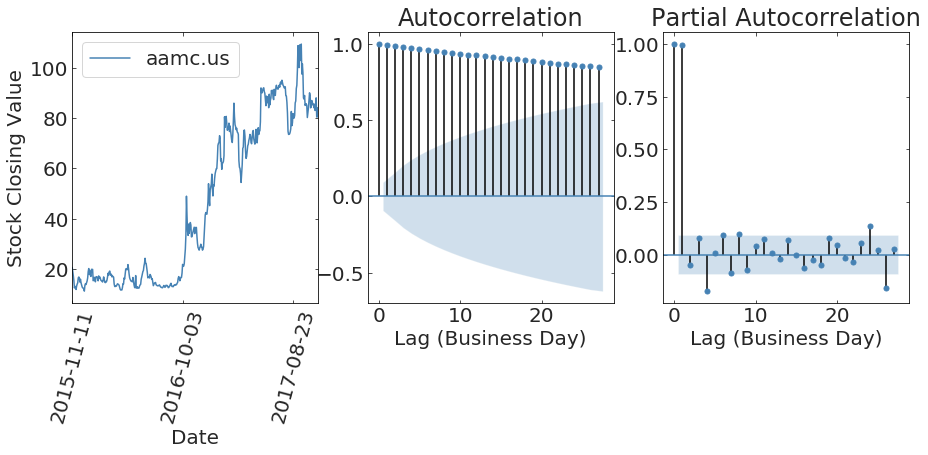

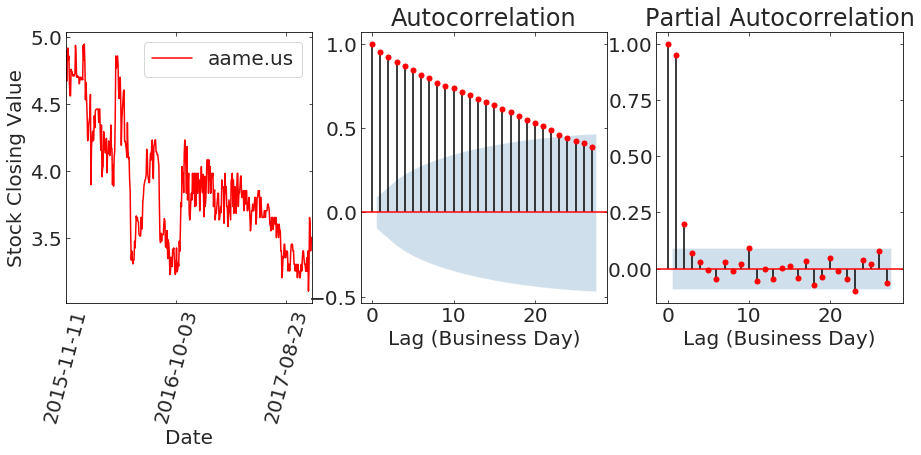

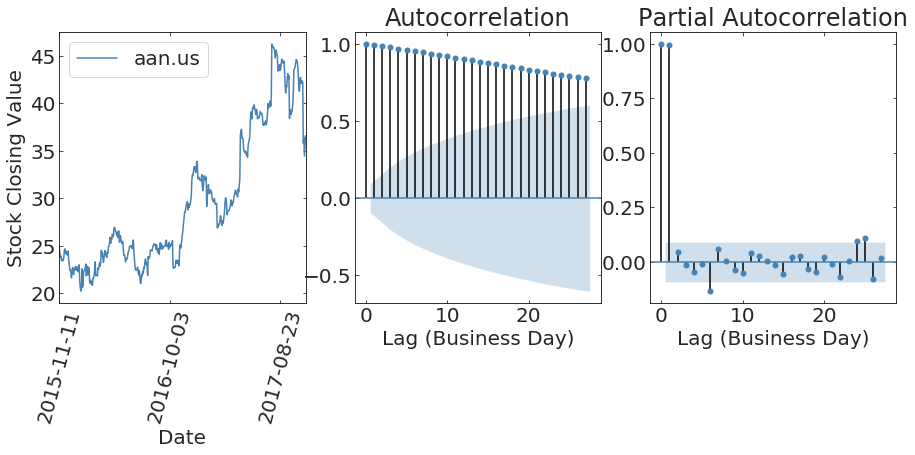

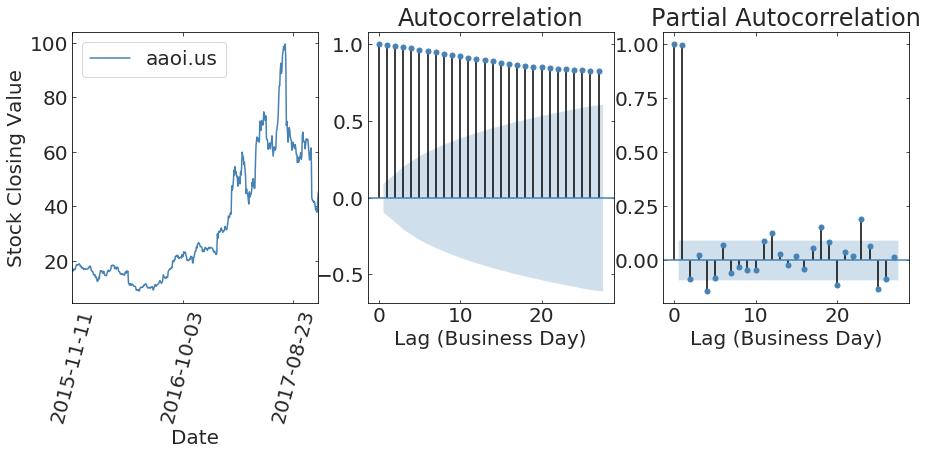

In [0]:
for c in tss.columns: 
  ####the if  else statement is to change the color of any stationary time series. 
  #######in this case there is only one. 
  if c =="aame.us":
    fig, axs = pl.subplots(1, 3, figsize=(15,5))
    tss.plot(y=c, ax=axs[0], rot=75, c= 'r') 

    #######plotting the auto correlation and partial auto correlation.    
    sm.graphics.tsa.plot_acf(tss[c], ax=axs[1], c= 'r')
    sm.graphics.tsa.plot_pacf(tss[c], ax=axs[2], c= 'r') 
    
    ######adding axes lables.
    axs[0].set_ylabel('Stock Closing Value')
    axs[1].set_xlabel('Lag (Business Day)')
    axs[2].set_xlabel('Lag (Business Day)')
    plt.plot()

  else:  
    fig, axs = pl.subplots(1, 3, figsize=(15,5))
    tss.plot(y=c, ax=axs[0], rot=75) 
    sm.graphics.tsa.plot_acf(tss[c], ax=axs[1])
    sm.graphics.tsa.plot_pacf(tss[c], ax=axs[2]) 
    axs[0].set_ylabel('Stock Closing Value')
    axs[1].set_xlabel('Lag (Business Day)')
    axs[2].set_xlabel('Lag (Business Day)')
    plt.plot()  





Figure 4: For each data set, the time series, auto-correlation and partial auto correaltion are plotted. The auto correaltion reveals,the memory of data to previous data point relative to a temporal separation(lag time). The partial auto correlation follows the same principles, expect that it excludes other dependencies of that data point. All plots in blue are with our non-stationary time series, and red is used for the stationary one. At higher lag steps each of the data set becomes less self-similar. 

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC (Akaike Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [0]:
###### the model fitting method, ARMA, used on the stationary time series
model_1 = sm.tsa.ARMA(tss[['aame.us']], (3,3)).fit()
model_1.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(3, 3)   Log Likelihood                 304.915
Method:                       css-mle   S.D. of innovations              0.122
Date:                Wed, 26 Feb 2020   AIC                           -593.831
Time:                        18:06:08   BIC                           -561.010
Sample:                             0   HQIC                          -580.891
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9258      0.203     19.362      0.000       3.528       4.323
ar.L1.aame.us    -0.3688      0.028    -13.189      0.000      -0.424      -0.314
ar.L2.aame.us     0.3750      0.022     16.679      0.000       0.331       0.419
ar.L3.aame.us     0.9310      0.028     33.447      0.000       0.876       0.986
ma.L1.aame.us     1.0894      0.056     19.628      0.000       0.981       1.198
ma.L2.aame.us     0.6172      0.072      8.618      0.000       0.477       0.758
ma.L3.aame.us    -0.2711      0.051     -5.307      0.000      -0.371      -0.171
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0194           -0.0000j            1.0194           -0.0000
AR.2           -0.7111           -0.7403j            1.0265           -0.3718
AR.3           -0.7111           +0.7403j            1.0265            0.3718
MA.1           -0.6882           -0.7322j            1.0049           -0.3701
MA.2           -0.6882           +0.7322j            1.0049            0.3701
MA.3            3.6534           -0.0000j            3.6534           -0.0000
-----------------------------------------------------------------------------
"""

Above is the summary for a ARMA model of the "aame.us" time series, for p=3 and q =3. The best fit parameters  are listed in the ar.L* for the auto regression  and ma.L* for the moving average. The parameter errors are in the column next to them. 

In [0]:
aics_arr = np.zeros((7,4))
for p in range(7):
    ####We  currently let set the limit to 4computationally there seems to be an limit as to 
    #########how big the moving average window can be before it starts to identify the data as non-stationay
    ########, but there seems to be no low limit as to how much it can be regressed. 
    for q in range(4):
      model_arm = sm.tsa.ARMA(tss[['aame.us']], (p,q)).fit()
      aics_arr[p][q] = model_arm.aic    



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [0]:
print(aics_arr)
print("best parameters: ", np.where(aics_arr == np.nanmin(aics_arr)))


[[ 522.01962759  106.2349101  -130.21340757 -245.70555257]
 [-568.13070573 -594.11492188 -592.25827415 -590.43749486]
 [-591.47273869 -592.27925171 -590.17488451 -588.4783452 ]
 [-591.54668302 -590.38288675 -588.42529716 -593.83079986]
 [-590.49404637 -588.51597313 -586.55835488 -591.46677606]
 [-588.53786819 -587.15492749 -592.33087669 -590.48227655]
 [-586.91474096 -585.77016458 -590.4423713  -587.53605197]]
best parameters:  (array([1]), array([1]))


Above is the array containg the AIC vaules for ARMA fit of different p and q values. The values of p and q are the the row and colum indices for the models respectivley, starting from 0, and indices increase down and to the right. Looking ofr the minimum AIC, as the criteria for the best model, we find that that p=1 and q=1 is the best, with an AIC of -594.

## 4. predict the in-set and the future values

you can use ```mod.plot_predict()``` to visualize them

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text xticklabel objects>)

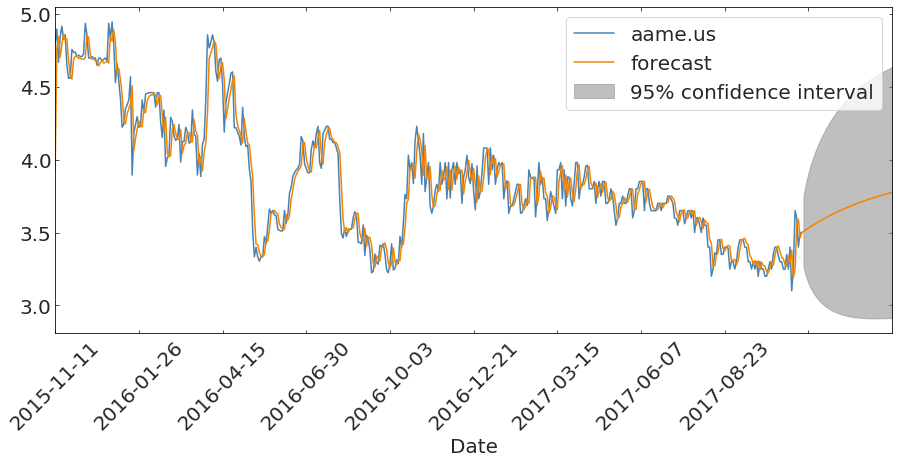

In [0]:
ax = tss[['aame.us']].plot(figsize=(15,6))
model_stat = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()
model_stat.plot_predict(end=500, plot_insample=False, ax=ax);
pl.xticks(rotation=45)

**==> Always remember: no caption no score!**

# 3.5 what are the coefficients of the best fit model? what do they mean? 


In [0]:
model_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 27 Feb 2020   AIC                           -594.115
Time:                        02:07:01   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

Fig 5: Above is the plotting of the time series with the best fit ARMA model, with p=1 and q = 1. The model seem to be similiar in shape to the time series, but has a temporal offset and under shoot the peaks. The best fit coefficents for AR are 0.9811, and for MA  are -0.2706.  

**-->missing the questions: What do they mean?**

#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

In [0]:
aics_ns_arr = np.zeros((8,2))
for p in range(8):
    ####We  currently let set the limit to 4computationally there seems to be an limit as to 
    #########how big the moving average window can be before it starts to identify the data as non-stationay
    ########, but there seems to be no low limit as to how much it can be regressed. 
    for q in range(2):
      model_arim = sm.tsa.ARIMA(tss[['aaba.us']], (p, 1, q)).fit()
      aics_ns_arr[p][q] = model_arim.aic    



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [0]:
print("best parameters: ", np.where(aics_ns_arr == np.nanmin(aics_ns_arr)))
print(aics_ns_arr)

best parameters:  (array([3]), array([0]))
[[1030.77721821 1024.34260676]
 [1024.40213466 1025.0148773 ]
 [1026.39731591 1026.98310769]
 [1022.00154597 1023.95318379]
 [1023.96855874 1025.94713359]
 [1025.65973458 1026.71733552]
 [1026.31584496 1026.66667925]
 [1028.02243646 1028.59974181]]


This is the fit of the ARIMA Model on the "aaba.us" time series, with d=1. Follow the same numerical format as above with the ARMA model, where the array list all of the AIC values for various p and q. The minimum AIC comes from p=3 and q = 0, with AIC = 1022.001..., so we use it as our best model.  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dis

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text xticklabel objects>)

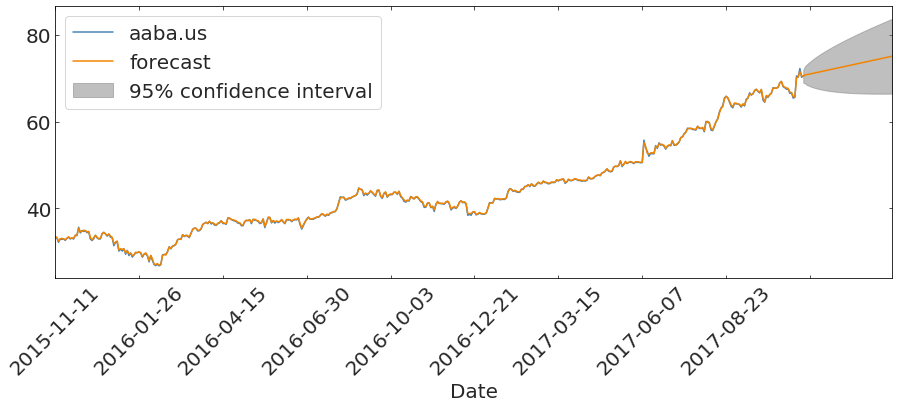

In [0]:
ax = tss[['aaba.us']].plot(figsize=(15,5))
model_ns_1 = sm.tsa.ARIMA(tss[['aaba.us']], (3, 1, 0)).fit()
model_ns_1.plot_predict(end=500, plot_insample=False, ax=ax);
pl.xticks(rotation=45)

Figure 6: Above is the plotting of the time series with the best fit ARIMA model of "aaba.us", with p=3 and q = 0, and d =1. With the introduction of differencing, the non-stationary model can be fit well to the existing data, and like the earlier ARMA model predicts stock value growth. 

In [0]:
aics_ns_arr_2 = np.zeros((8,2))
for p in range(8):
    ####We  currently let set the limit to 4computationally there seems to be an limit as to 
    #########how big the moving average window can be before it starts to identify the data as non-stationay
    ########, but there seems to be no low limit as to how much it can be regressed. 
    for q in range(2):
      model_arim = sm.tsa.ARIMA(tss[['a.us']], (p, 1, q)).fit()
      aics_ns_arr_2[p][q] = model_arim.aic    


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [0]:
print("best parameters: ", np.where(aics_ns_arr_2 == np.nanmin(aics_ns_arr_2)))
print(aics_ns_arr_2)

best parameters:  (array([2]), array([1]))
[[844.37533306 842.566713  ]
 [842.48649507 844.48637734]
 [844.48616508 841.69739041]
 [843.33808637 842.26510583]
 [843.98831111 843.26274346]
 [845.97265862 845.79452038]
 [843.89538946 845.76099861]
 [845.82567435 847.01029354]]


This is the fit of the ARIMA Model on the "a.us" time series, with d=1. We follow the same numerical format as above, where the array list all of the AIC values for various p and q. The minimum AIC comes from p=2 and q = 1, with AIC = 841.69..., so we use it as our best model. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dis

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text xticklabel objects>)

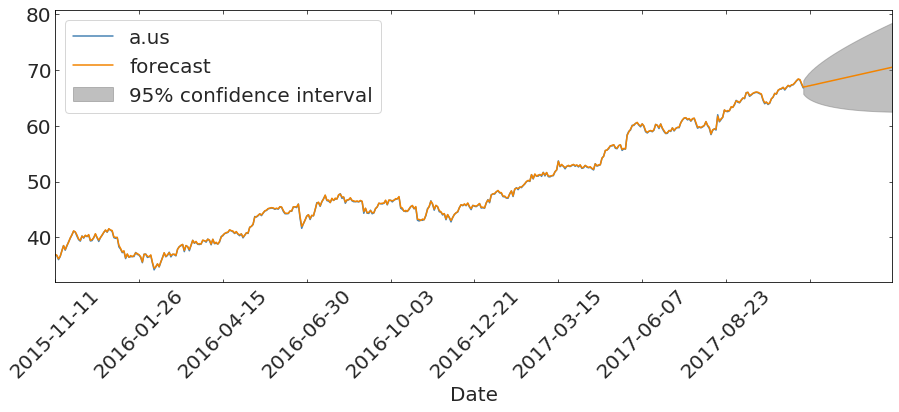

In [0]:
ax = tss[['a.us']].plot(figsize=(15,5))
model_ns_2 = sm.tsa.ARIMA(tss[['a.us']], (2, 1, 1)).fit()
model_ns_2.plot_predict(end=500, plot_insample=False, ax=ax); 
pl.xticks(rotation=45)

Figure 7: Above is the plotting of the time series with the best fit ARIMA model of "a.us", with p=2 and q = 1, and d =1. As with the other ARIMA model diffenceing term work sell for the non-stationary times allow it to make a predciton that seems to fit the overall trend.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text xticklabel objects>)

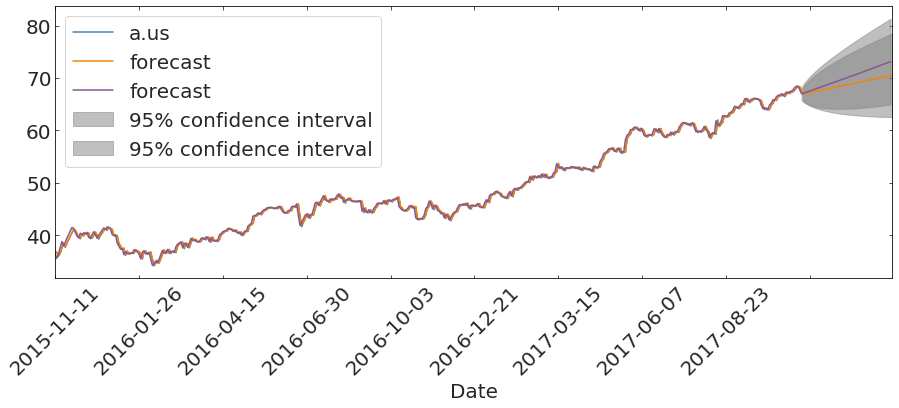

In [0]:
####this is to contrast two models with different integration indices. 
ax = tss[['a.us']].plot(figsize=(15,5))
model_ns_2 = sm.tsa.ARIMA(tss[['a.us']], (2, 1, 1)).fit()
model_ns_3 = sm.tsa.ARIMA(tss[['a.us']], (2, 2, 1)).fit()
model_ns_2.plot_predict(end=500, plot_insample=False, ax=ax); 
model_ns_3.plot_predict(end=500, plot_insample=False, ax=ax); 
pl.xticks(rotation=45)

Figure 8: Above are the time series plotted with the ARIMA models for p=2, q =1, and one having d=1 (orange) and d = 2 ( purple). The models tend to match the time series. However, at the pediction, d= 2 model makes a higher and linearly-steeper predictions. 

In [0]:
model_ns_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.a.us   No. Observations:                  446
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -415.849
Method:                       css-mle   S.D. of innovations              0.615
Date:                Wed, 26 Feb 2020   AIC                            841.697
Time:                        23:00:42   BIC                            862.199
Sample:                             1   HQIC                           849.781
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0674      0.026      2.575      0.010       0.016       0.119
ar.L1.D.a.us    -0.9979      0.094    -10.582      0.000      -1.183      -0.813
ar.L2.D.a.us    -0.1279      0.048     -2.648      0.008      -0.222      -0.033
ma.L1.D.a.us     0.9103      0.085     10.746      0.000       0.744       1.076
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1808           +0.0000j            1.1808            0.5000
AR.2           -6.6239           +0.0000j            6.6239            0.5000
MA.1           -1.0986           +0.0000j            1.0986            0.5000
-----------------------------------------------------------------------------
"""

In [0]:
model_ns_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.a.us   No. Observations:                  445
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -420.541
Method:                       css-mle   S.D. of innovations              0.618
Date:                Wed, 26 Feb 2020   AIC                            851.081
Time:                        23:00:46   BIC                            871.572
Sample:                             2   HQIC                           859.161
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.899      0.369      -0.000       0.001
ar.L1.D2.a.us    -0.0930      0.048     -1.958      0.051      -0.186       0.000
ar.L2.D2.a.us    -0.0006      0.048     -0.013      0.990      -0.094       0.093
ma.L1.D2.a.us    -0.9999      0.006   -164.255      0.000      -1.012      -0.988
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -11.6404           +0.0000j           11.6404            0.5000
AR.2         -140.6044           +0.0000j          140.6044            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

Above, we compare the ARIMA model for the 'a.u' time series, with p =2 and q = 1, for one where d = 1 and d = 2. We see that the coefficents are different, the d=2 model generates coefficents with lower magnitude in the auto regression and larger in the moving average. However, the AIC is larger for the d=2 model, meaning we would be best to select the minima, d = 1. However this d=2 model could be the minima among models of that differencing.